### Install important packages

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import pypdf


In [2]:
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
import nltk   #natural language toolkit for preprocessing the text data
from nltk.stem import WordNetLemmatizer   #used to Lemmatize using WordNet's    #built-in morphy function.Returns the input word unchanged if it cannot #be found in WordNet. 

from nltk.stem import SnowballStemmer #used for stemming in NLP
from nltk.stem.porter import * #porter stemming 

from wordcloud import WordCloud #visualization techniques for #frequently repeated texts 

nltk.download('wordnet')  #database of words in more than 200 #languages

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.

In [5]:
! pip install --upgrade gensim

In [6]:
import gensim #library for topic modelling 
from gensim.models import LdaMulticore
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from nltk.stem.porter import *
#spacy
import spacy
from nltk.corpus import stopwords

In [7]:
import nltk   #natural language toolkit for preprocessing the text data

from nltk.stem import WordNetLemmatizer   #used to Lemmatize using WordNet's    #built-in morphy function.Returns the input word unchanged if it cannot #be found in WordNet. 

from nltk.stem import SnowballStemmer #used for stemming in NLP
from nltk.stem.porter import * #porter stemming 

from wordcloud import WordCloud #visualization techniques for #frequently repeated texts 

nltk.download('wordnet')  #database of words in more than 200 #languages

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
! pip install wordcloud  #installing wordcloud library

In [9]:
from os import listdir
from os.path import isfile, join

In [10]:
!pip install pdfplumber

  Obtaining dependency information for pdfplumber from https://files.pythonhosted.org/packages/f8/d3/f58c2d5d86a585e438c6708f568eca79e7c4e6ee3d5210cf8b31d38cb021/pdfplumber-0.10.3-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 42.1 MB/s eta 0:00:00
  Obtaining dependency information for pypdfium2>=4.18.0 from https://files.pythonhosted.org/packages/c7/2f/0ba6715e498a467195d132dfd38238469fb07afb19c6dea1a6d0c4163cc2/pypdfium2-4.25.0-py3-none-manylinux_2_17_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.5 MB/s eta 0:00:00


In [11]:
import glob
import pdfplumber

### Step 1 : Make smaller sample size of 100 resumes and job postings & feature engineering

In [12]:
job_postings = pd.read_csv('/kaggle/input/linkedin-job-postings/job_postings.csv')
job_postings100=job_postings.loc[0:99]
resume = pd.read_csv('/kaggle/input/resume-dataset/Resume/Resume.csv')
resume100=resume.loc[0:99]

In [13]:
resume100.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [14]:
job_postings100.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


In [15]:
#drop the 26 columns you don't need 
job_postings1002=job_postings100.drop(columns=['job_id','company_id', 'max_salary', 'med_salary','min_salary', 'pay_period','formatted_work_type','location','closed_time', 'formatted_experience_level', 'skills_desc', 'listed_time','applies', 'original_listed_time','remote_allowed','views','job_posting_url','application_url','application_type','expiry', 'posting_domain','sponsored','work_type', 'currency','compensation_type', 'scraped'])
job_postings1002.shape


(100, 2)

In [16]:
job_postings1002.head()

,title,description
0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...
1,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...
2,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...
3,Cook,descriptionTitle\n\n Looking for a great oppor...
4,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ..."


In [17]:
#Feature Engineering 
#Deleting the publish data column since we want only headline_text columns. 
del job_postings1002['title']

In [18]:
job_postings1002.head()

,description
0,Overview\n\nHearingLife is a national hearing ...
1,Metalcraft of Mayville\nMetalcraft of Mayville...
2,\nThe TSUBAKI name is synonymous with excellen...
3,descriptionTitle\n\n Looking for a great oppor...
4,"Job Summary\nAt iHerb, we are on a mission to ..."


#### Using wordcloud to get a look at the most frequently appearing words from our datasets

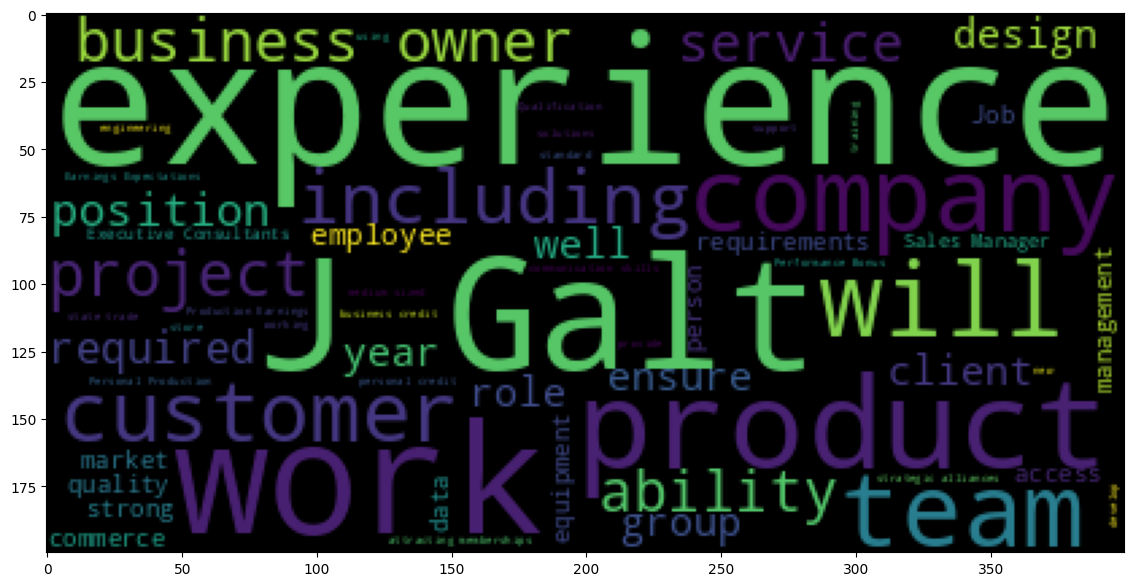

In [19]:
#word cloud visualization for the description 
wc = WordCloud(
    background_color='black',
    max_words = 100, 
    random_state = 42,
    max_font_size=110
    )
wc.generate(' '.join(job_postings1002['description']))
plt.figure(figsize=(50,7))
plt.imshow(wc)
plt.show()

### Topic modeling using Gensim in NLP 
#### Preprocessing

In [20]:
#function to perform the pre processing steps on the  dataset
stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))


# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            #Apply lemmatize_stemming on the token, then add to the results list
            result.append(lemmatize_stemming(token))
    return result

In [21]:
processed_docs = job_postings1002['description'].map(preprocess)
processed_docs[:10]

0    [overview, hearinglif, nation, hear, care, com...
1    [metalcraft, mayvill, metalcraft, mayvill, equ...
2    [tsubaki, synonym, excel, qualiti, depend, cus...
3    [look, great, opportun, develop, profession, s...
4    [summari, iherb, mission, health, well, access...
5    [locat, remot, unit, state, america, cardiac, ...
6    [compani, gerber, collis, glass, welcom, gerbe...
7    [assist, store, director, activ, involv, provi...
8    [sign, bonus, guarante, look, foot, door, esta...
9    [instrument, qualiti, control, repres, locat, ...
Name: description, dtype: object

In [22]:
#Create a dictionary from 'processed_docs' containing the number of times a word appears 
dictionary = gensim.corpora.Dictionary(processed_docs)

In [23]:
dictionary #it return the object , hence dictionary is created 


In [24]:
#confirm if the Dictionary is created 
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 5:
        break

0 abil
1 accord
2 accur
3 achiev
4 act
5 action


In [25]:
from gensim import corpora

In [26]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(job_postings1002['description'])
print (lemmatized_texts[0][0:100])

overview national hearing care company part global leader hear healthcare build heritage care health


In [27]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print (data_words[0][0:20])

['overview', 'national', 'hearing', 'care', 'company', 'part', 'global', 'leader', 'hear', 'healthcare', 'build', 'heritage', 'care', 'health', 'innovation', 'operate', 'more', 'hearing', 'care', 'center']


In [28]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

word = id2word[[0][:1][0]]
print (word)

[(0, 3), (1, 2), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 10), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2)]
ability


In [29]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, #change the. number of topics 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [30]:
#explore the words occuring in that topic and its relative weight
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.014*"guest" + 0.013*"service" + 0.013*"recruitment" + 0.011*"store" + 0.011*"beauty" + 0.010*"experience" + 0.009*"include" + 0.009*"product" + 0.008*"process" + 0.008*"role"


Topic: 1 
Words: 0.013*"experience" + 0.011*"work" + 0.010*"customer" + 0.009*"product" + 0.009*"include" + 0.008*"project" + 0.008*"management" + 0.008*"skill" + 0.007*"other" + 0.007*"datum"


Topic: 2 
Words: 0.038*"pay" + 0.023*"benefit" + 0.023*"insurance" + 0.015*"health" + 0.015*"participate" + 0.008*"professional" + 0.008*"include" + 0.008*"opportunity" + 0.008*"service" + 0.008*"company"


Topic: 3 
Words: 0.027*"manufacturing" + 0.017*"process" + 0.012*"team" + 0.012*"continuous" + 0.012*"ensure" + 0.011*"drug" + 0.011*"production" + 0.011*"facility" + 0.010*"quality" + 0.009*"material"


Topic: 4 
Words: 0.015*"sale" + 0.011*"store" + 0.009*"include" + 0.009*"patient" + 0.009*"employee" + 0.008*"survey" + 0.008*"experience" + 0.007*"life" + 0.006*"require" + 0.006*"work"


Topic: 5 

## Step 2: Create a pdf Reader

In [31]:
import pypdf
import os

In [32]:
# creating a pdf reader object
pdfReader = pypdf.PdfReader(pdfFileObj)
 
# printing number of pages in pdf file
print(len(pdfReader.pages))
 
# creating a page object
pageObj = pdfReader.pages[0] #write for loop to get all pages
 
# extracting text from page
print(pageObj.extract_text())

NameError: name 'pdfFileObj' is not defined

In [ ]:
# extracting text from page 
textpdf = pageObj.extract_text() 
#print(textpdf) 

#### Define function to extract text from pdf


In [ ]:
# Create a function to extract text

def text_extraction(element):
    # Extracting the text from the in-line text element
    line_text = element.get_text()
    
    # Find the formats of the text
    # Initialize the list with all the formats that appeared in the line of text
    line_formats = []
    for text_line in element:
        if isinstance(text_line, LTTextContainer):
            # Iterating through each character in the line of text
            for character in text_line:
                if isinstance(character, LTChar):
                    # Append the font name of the character
                    line_formats.append(character.fontname)
                    # Append the font size of the character
                    line_formats.append(character.size)
    # Find the unique font sizes and names in the line
    format_per_line = list(set(line_formats))
    
    # Return a tuple with the text in each line along with its format
    return (line_text, format_per_line)

In [ ]:
#Make a list of absolute path's to all of the PDF files in the target folder
files = [join(path, f) for f in listdir(path) if isfile(join(path, f)) and join(path, f).endswith('.pdf')]


In [ ]:
filestext = []

In [ ]:
for f in files:
    with open(f, 'rb') as file_handle:
        # Set strict=False to allow PDF files that don't comply to the PDF spec: https://www.pdfa.org/resource/pdf-specification-index/
        pdf_reader = pypdf.PdfReader(file_handle, strict=False)
        page_text = ''
        # Iterate through each page in the PDF document to extract the text and add to plain-text string
        for page_num in range(0, len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            page_text += page.extract_text() #add new text to old/ incrimental addition 
    # Write the plain text string to a file with the same name
    #with open(f.replace('.pdf', '.txt'), 'a+') as text_file_handle:
        #text_file_handle.writelines(page_text)
        filestext.append(page_text) # list of test
        
        #create pandas dataframe --for loop
        #create column - 
        # each row contains resume

In [ ]:
df = pd.DataFrame({'FilePath':files, 'FileText': filestext})

#### Clean pdf file

In [ ]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
print ("Displaying the distinct categories of resume:\n\n ")
print (resume['Category'].unique())

In [ ]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (resume['Category'].value_counts())

In [ ]:
resume['cleaned_resume'] = ''

In [ ]:
import re
def cleanResume(textpdf):
    resumeText = re.sub('http\S+\s*', ' ', textpdf)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', textpdf)  # remove RT and cc
    resumeText = re.sub('#\S+', '', textpdf)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', textpdf)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', textpdf)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', textpdf) 
    resumeText = re.sub('\s+', ' ', textpdf)  # remove extra whitespace
    return textpdf
    

In [ ]:
resume.head()

### Read multiple pdfs

In [ ]:
def myApp():
    import os    
    import pytesseract

Python script for finding words of interest in pdf files in folder path with multiple file formats


In [ ]:
path1 = r"/kaggle/input/resume-dataset/data/data"

In [ ]:
# Top 5 keywords from topic modeling
Topic 0: "guest","service", "recruitment","store","beauty"
Topic 1: "experience,work, customer,product,include"
Topic 2: "pay,benefit, insurance,health,participate"
Topic 3: "manufacturing,process, team,continuous,"ensure"
Topic 4: "sale,store, include,patient,employee"
Topic 5: "experience,team, work,repair,year"
Topic 6: "provide,include, service,quality,customer"
Topic 7: "experience,work, research,client,market"
Topic 8: "work,experience, team,customer,product"
Topic 9: "business,sale, team,credit,personal"




In [ ]:
list_of_cvs0 = []

keywords = "guest, service, recruitment, store, beauty".replace(", ", "|")
for root, dirs, files in os.walk(path1):
    for file in files:
        if file.endswith('.pdf') or file.endswith('.PDF'): #different extensions on the raw dat
            with pdfplumber.open(root+'/'+ file) as pdf:
                full_text = ''
                for page in pdf.pages:
                    text = page.extract_text()
                    full_text += text #incremental add to the variable - this will hold the entire pdf
                result = re.search(keywords, full_text)
                if result: 
                       list_of_cvs.append(file) #storing files in a list 
                    
                        


In [ ]:
#print list_of_cvs - this will contain all the pdf files with the keywords

In [ ]:
print(list_of_cvs0)

In [ ]:
list_of_cvs1 = []

keywords = "experience, work, customer, product, include".replace(", ", "|")
for root, dirs, files in os.walk(path1):
    for file in files:
        if file.endswith('.pdf') or file.endswith('.PDF'): #different extensions on the raw dat
            with pdfplumber.open(root+'/'+ file) as pdf:
                full_text = ''
                for page in pdf.pages:
                    text = page.extract_text()
                    full_text += text #incremental add to the variable - this will hold the entire pdf
                result = re.search(keywords, full_text)
                if result: 
                       list_of_cvs.append(file) #storing files in a list 
                    
                        

In [ ]:
list_of_cvs1.head(5)

In [ ]:
list_of_cvs2 = []

keywords = "pay,benefit, insurance,health,participate".replace(", ", "|")
for root, dirs, files in os.walk(path1):
    for file in files:
        if file.endswith('.pdf') or file.endswith('.PDF'): #different extensions on the raw dat
            with pdfplumber.open(root+'/'+ file) as pdf:
                full_text = ''
                for page in pdf.pages:
                    text = page.extract_text()
                    full_text += text #incremental add to the variable - this will hold the entire pdf
                result = re.search(keywords, full_text)
                if result: 
                       list_of_cvs.append(file) #storing files in a list 
                    
                        

In [ ]:
list_of_cvs2.head(5)

In [ ]:
list_of_cvs3 = []

keywords = "pay,benefit, insurance,health,participate".replace(", ", "|")
for root, dirs, files in os.walk(path1):
    for file in files:
        if file.endswith('.pdf') or file.endswith('.PDF'): #different extensions on the raw dat
            with pdfplumber.open(root+'/'+ file) as pdf:
                full_text = ''
                for page in pdf.pages:
                    text = page.extract_text()
                    full_text += text #incremental add to the variable - this will hold the entire pdf
                result = re.search(keywords, full_text)
                if result: 
                       list_of_cvs.append(file) #storing files in a list 
                    

In [ ]:
list_of_cvs3

In [ ]:
list_of_cvs4 = []

keywords = "pay,benefit, insurance,health,participate".replace(", ", "|")
for root, dirs, files in os.walk(path1):
    for file in files:
        if file.endswith('.pdf') or file.endswith('.PDF'): #different extensions on the raw dat
            with pdfplumber.open(root+'/'+ file) as pdf:
                full_text = ''
                for page in pdf.pages:
                    text = page.extract_text()
                    full_text += text #incremental add to the variable - this will hold the entire pdf
                result = re.search(keywords, full_text)
                if result: 
                       list_of_cvs.append(file) #storing files in a list 
                    

In [ ]:
list_of_cvs4

In [ ]:
list_of_cvs5 = []

keywords = "pay,benefit, insurance,health,participate".replace(", ", "|")
for root, dirs, files in os.walk(path1):
    for file in files:
        if file.endswith('.pdf') or file.endswith('.PDF'): #different extensions on the raw dat
            with pdfplumber.open(root+'/'+ file) as pdf:
                full_text = ''
                for page in pdf.pages:
                    text = page.extract_text()
                    full_text += text #incremental add to the variable - this will hold the entire pdf
                result = re.search(keywords, full_text)
                if result: 
                       list_of_cvs.append(file) #storing files in a list 
                    

In [ ]:
list_of_cvs5

In [ ]:
list_of_cvs6 = []

keywords = "pay,benefit, insurance,health,participate".replace(", ", "|")
for root, dirs, files in os.walk(path1):
    for file in files:
        if file.endswith('.pdf') or file.endswith('.PDF'): #different extensions on the raw dat
            with pdfplumber.open(root+'/'+ file) as pdf:
                full_text = ''
                for page in pdf.pages:
                    text = page.extract_text()
                    full_text += text #incremental add to the variable - this will hold the entire pdf
                result = re.search(keywords, full_text)
                if result: 
                       list_of_cvs.append(file) #storing files in a list 
                    

In [ ]:
list_of_cvs6

In [ ]:
list_of_cvs7 = []

keywords = "pay,benefit, insurance,health,participate".replace(", ", "|")
for root, dirs, files in os.walk(path1):
    for file in files:
        if file.endswith('.pdf') or file.endswith('.PDF'): #different extensions on the raw dat
            with pdfplumber.open(root+'/'+ file) as pdf:
                full_text = ''
                for page in pdf.pages:
                    text = page.extract_text()
                    full_text += text #incremental add to the variable - this will hold the entire pdf
                result = re.search(keywords, full_text)
                if result: 
                       list_of_cvs.append(file) #storing files in a list 
                    

In [ ]:
list_of_cvs7

In [ ]:
list_of_cvs8 = []

keywords = "pay,benefit, insurance,health,participate".replace(", ", "|")
for root, dirs, files in os.walk(path1):
    for file in files:
        if file.endswith('.pdf') or file.endswith('.PDF'): #different extensions on the raw dat
            with pdfplumber.open(root+'/'+ file) as pdf:
                full_text = ''
                for page in pdf.pages:
                    text = page.extract_text()
                    full_text += text #incremental add to the variable - this will hold the entire pdf
                result = re.search(keywords, full_text)
                if result: 
                       list_of_cvs.append(file) #storing files in a list 
                    

In [ ]:
list_of_cvs8

In [ ]:
list_of_cvs9 = []

keywords = "pay,benefit, insurance,health,participate".replace(", ", "|")
for root, dirs, files in os.walk(path1):
    for file in files:
        if file.endswith('.pdf') or file.endswith('.PDF'): #different extensions on the raw dat
            with pdfplumber.open(root+'/'+ file) as pdf:
                full_text = ''
                for page in pdf.pages:
                    text = page.extract_text()
                    full_text += text #incremental add to the variable - this will hold the entire pdf
                result = re.search(keywords, full_text)
                if result: 
                       list_of_cvs.append(file) #storing files in a list 
                    

In [ ]:
list_of_cvs9.head()